# Regression

# Boston Housing Price Prediction 


In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

1.16.5
0.25.1
3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
0.21.3


In [3]:
df = pd.read_csv('data//housing.data', delim_whitespace=True, header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

In [5]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [6]:
df.columns = col_name

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


alternatively, one can load the data from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) itself

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()

In [9]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [10]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['MEDV'] = boston.target

In [12]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Anaysis (EDA)

In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.9.0


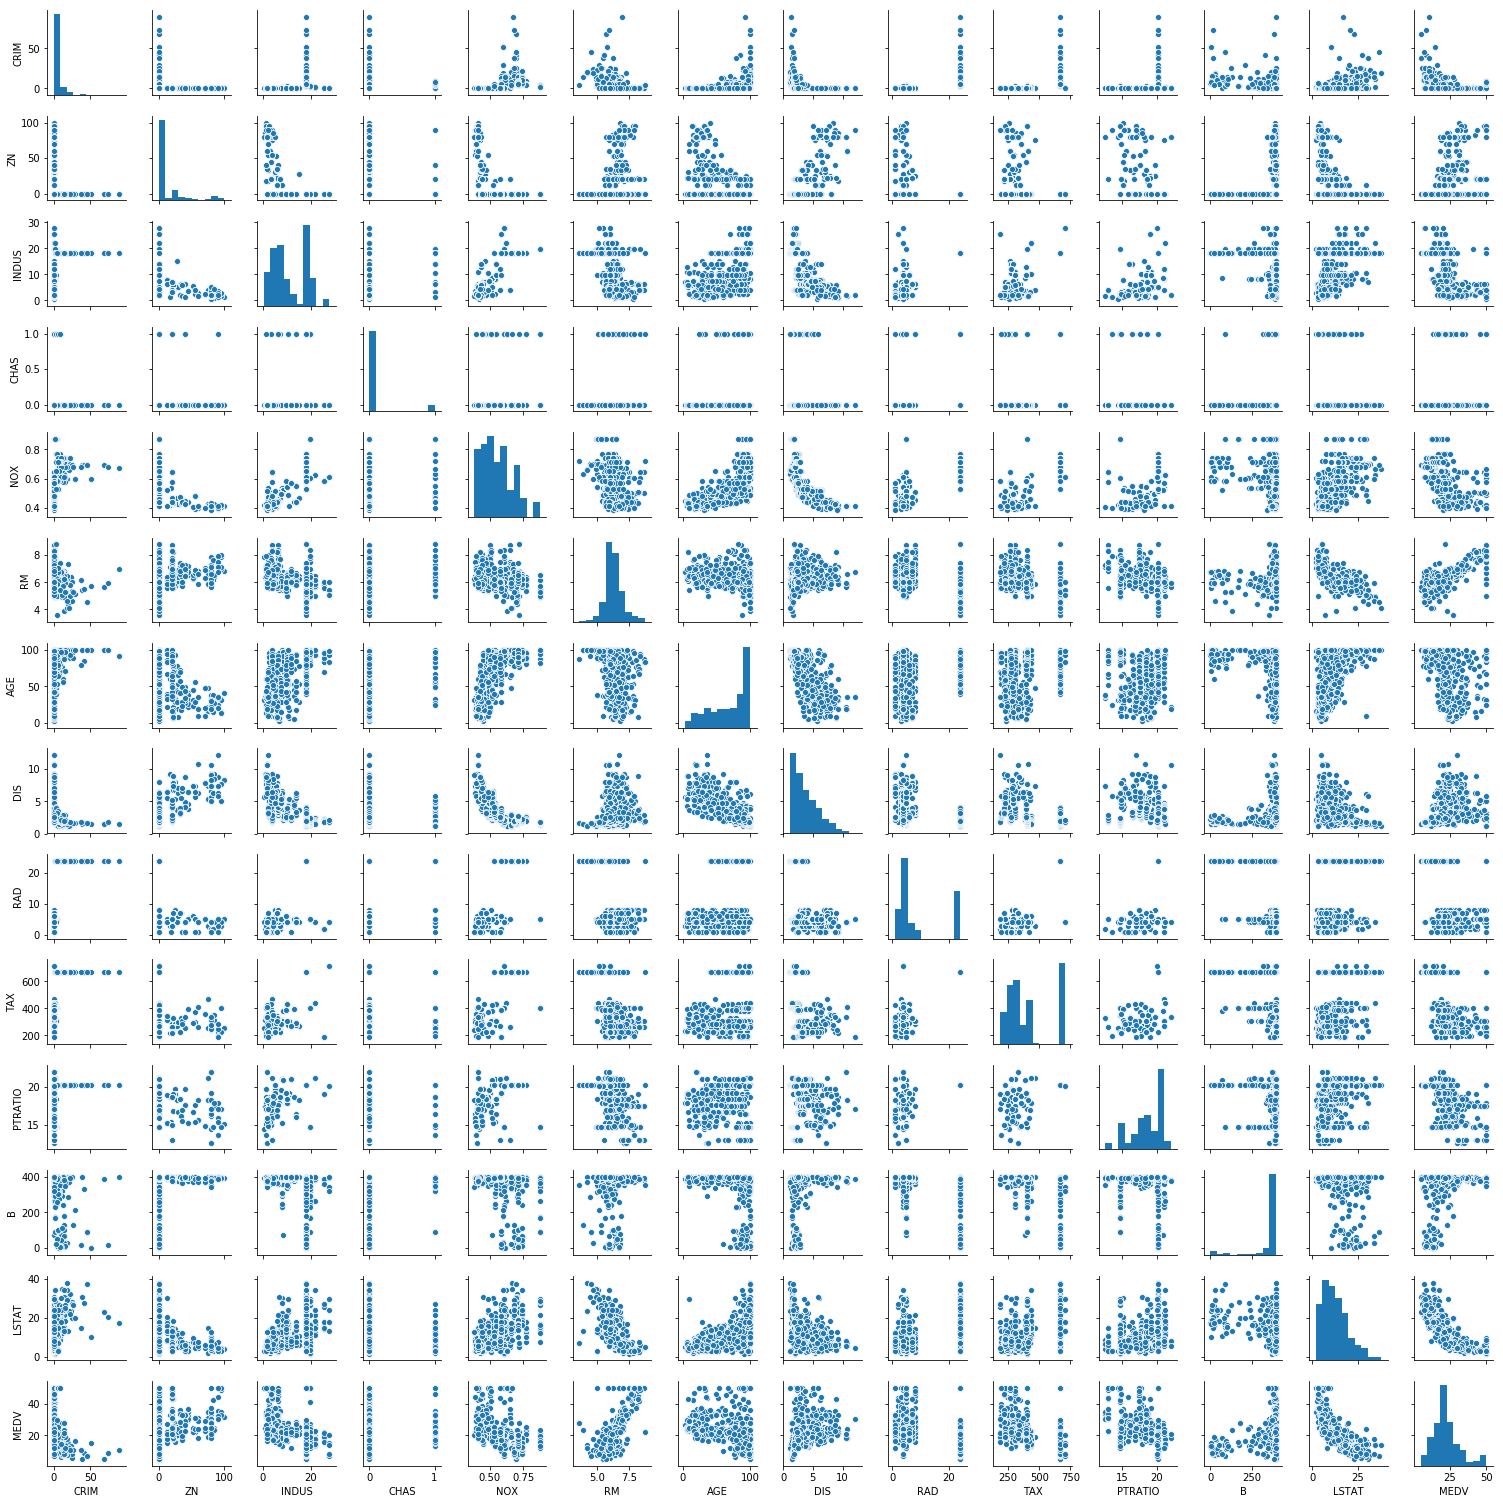

In [15]:
sns.pairplot(df, height=1.5);
plt.show()

In [16]:
col_study = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM']

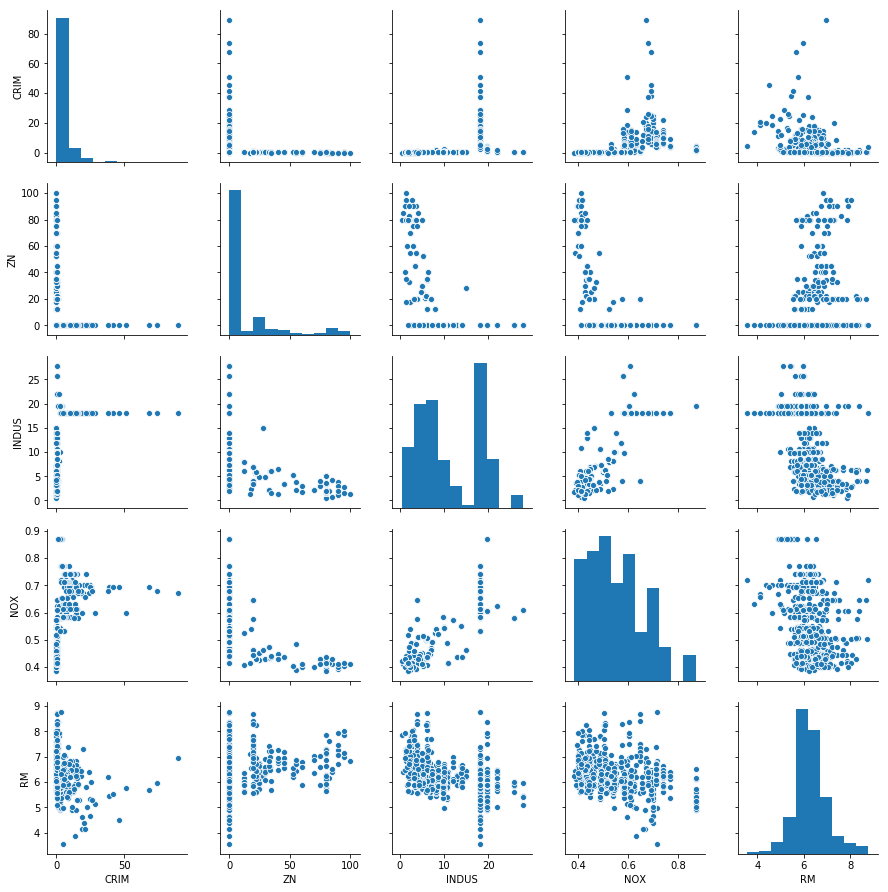

In [17]:
sns.pairplot(df[col_study], height=2.5);
plt.show()

| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

In [18]:
col_study = ['PTRATIO', 'B', 'LSTAT', 'MEDV']

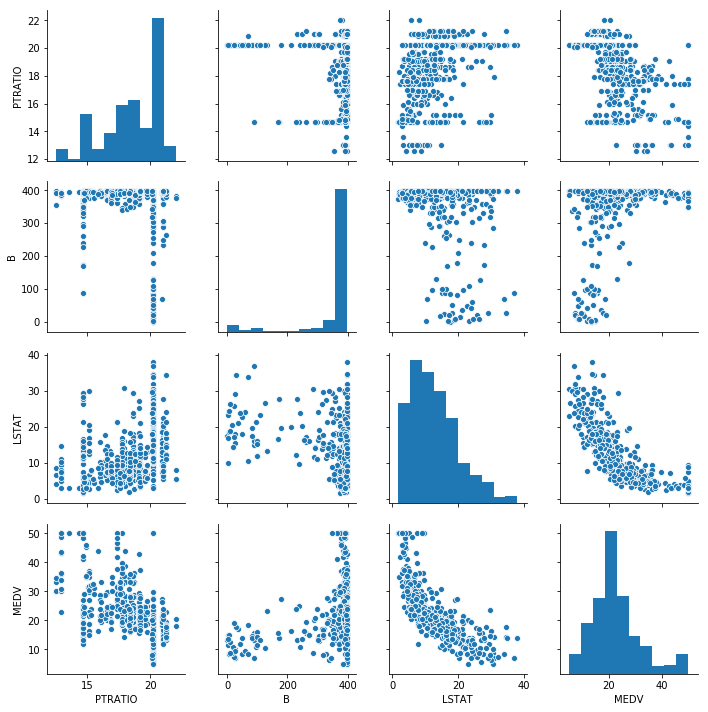

In [19]:
sns.pairplot(df[col_study], height=2.5);
plt.show()

***

# Correlation Analysis and Feature Selection

In [20]:
pd.options.display.float_format = '{:,.2f}'.format

In [21]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


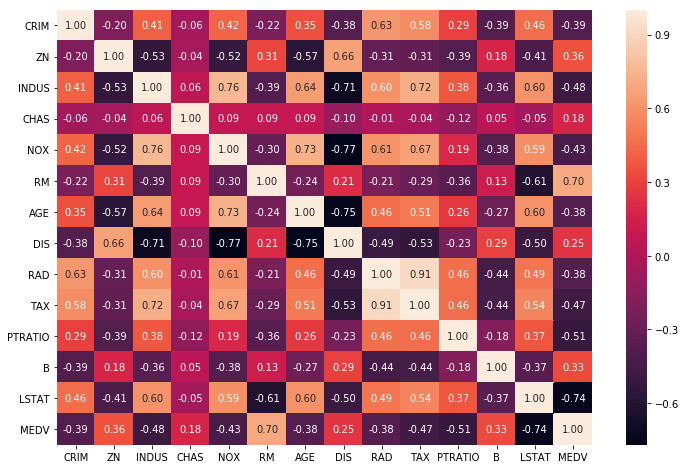

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

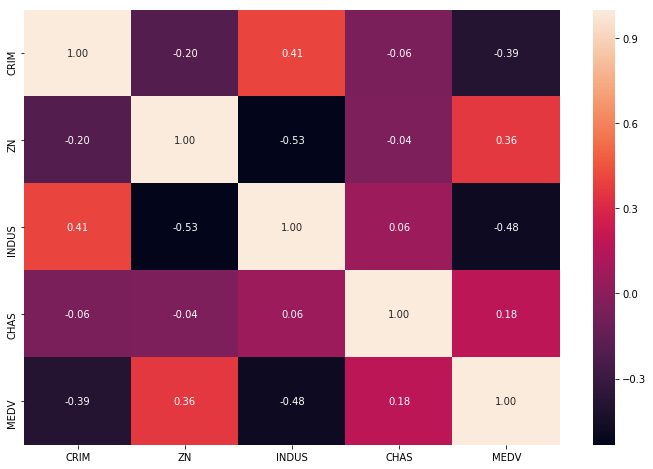

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']].corr(), annot=True, fmt=".2f")
plt.show()

In [25]:
import matplotlib as mpl
print(mpl.__version__)

3.0.3


***

# Linear Regression with Scikit-Learn

In [26]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [27]:
X = df['RM'].values.reshape(-1,1)

In [28]:
y = df['MEDV'].values

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [31]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
model.coef_

array([9.10210898])

In [33]:
model.intercept_

-34.67062077643857

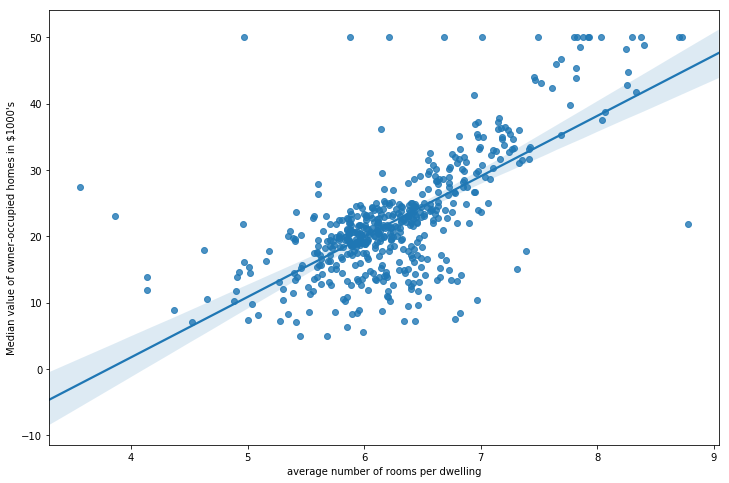

In [35]:
plt.figure(figsize=(12,8));
sns.regplot(X, y);
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

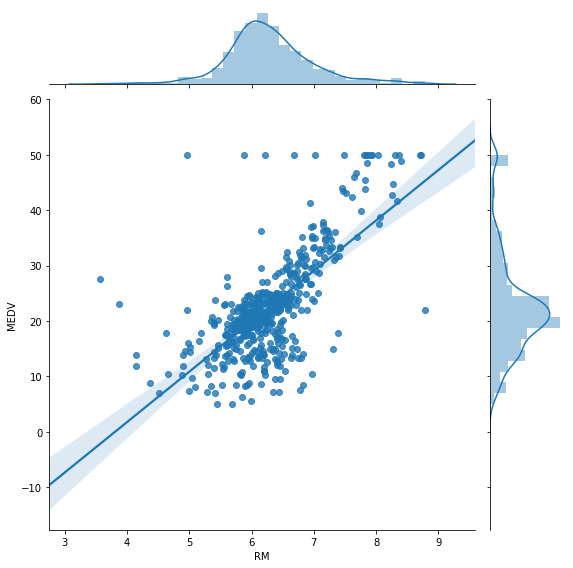

In [36]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', height=8);
plt.show();

In [37]:
model.predict(np.array([7]).reshape(1,-1))

array([29.04414209])

***

Below is from Jacob T. VanderPlas text, Python Data Science Handbook: Essential Tools for Working with Data

Basics of the API:

Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow):

1. Choose a class of model by importing the appropriate estimator class from Scikit- Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
   * For supervised learning, often we predict labels for unknown data using the predict() method.
   * For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

***

In [38]:
# Step 1: Selecting a model

# Step 2: Instantiation
ml_2 = LinearRegression()

# Step 3: Arrange data
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values

# Step 4: Model fitting
ml_2.fit(X, y)

# Step 5: Predict
ml_2.predict(np.array([15]).reshape(1,-1))

array([20.30310057])

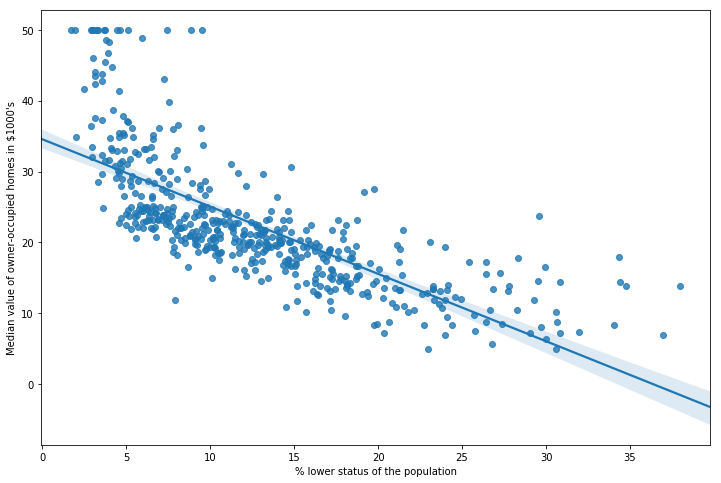

In [39]:
plt.figure(figsize=(12,8));
sns.regplot(X, y);
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

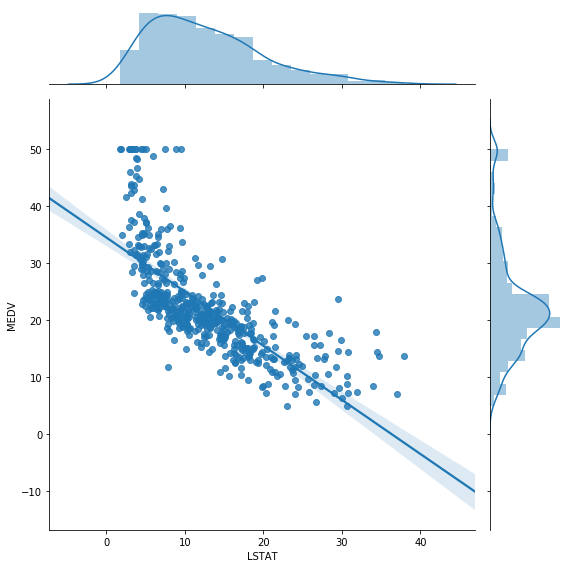

In [40]:
sns.jointplot(x='LSTAT', y='MEDV', data=df, kind='reg', height=8);
plt.show();

***

# Robust Regression

Outlier Demo: [http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html](http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html)

In [41]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


## RANdom SAmple Consensus (RANSAC) Algorithm

link = [http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression](http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression)

Each iteration performs the following steps:

1. Select `min_samples` random samples from the original data and check whether the set of data is valid (see `is_data_valid`).

2. Fit a model to the random subset (`base_estimator.fit`) and check whether the estimated model is valid (see `is_model_valid`).

3. Classify all data as inliers or outliers by calculating the residuals to the estimated model (`base_estimator.predict(X) - y`) - all data samples with absolute residuals smaller than the `residual_threshold` are considered as inliers.

4. Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

In [42]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

In [43]:
from sklearn.linear_model import RANSACRegressor

In [44]:
ransac = RANSACRegressor()

In [45]:
ransac.fit(X, y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [46]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [47]:
np.arange(3, 10, 1)

array([3, 4, 5, 6, 7, 8, 9])

In [48]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

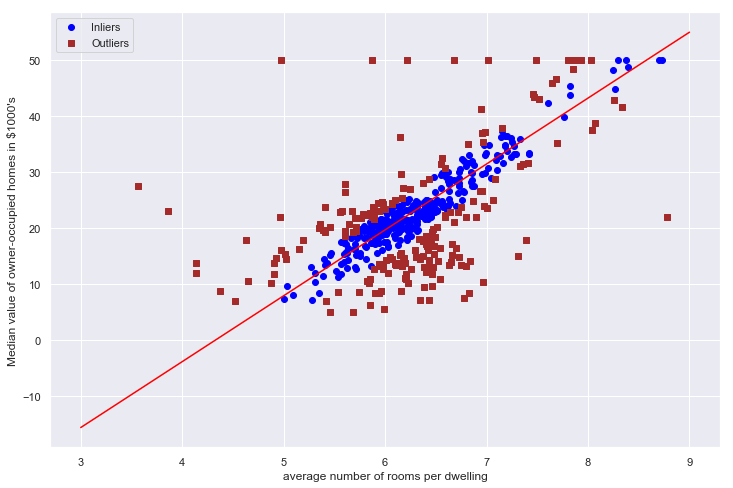

In [49]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

In [50]:
ransac.estimator_.coef_

array([11.77867543])

In [51]:
ransac.estimator_.intercept_

-51.000997760262095

***

In [52]:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0, 40, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

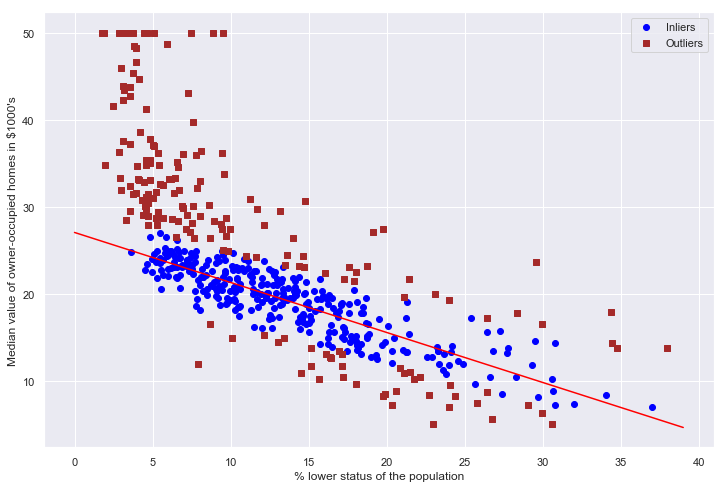

In [53]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper right')
plt.show()

***

# Performance Evaluation of Regression Model

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [56]:
#X = df['LSTAT'].values.reshape(-1,1)
X = df.iloc[:, :-1].values

In [57]:
y = df['MEDV'].values

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_train_pred = lr.predict(X_train)

In [62]:
y_test_pred = lr.predict(X_test)

***

# Method 1: Residual Analysis

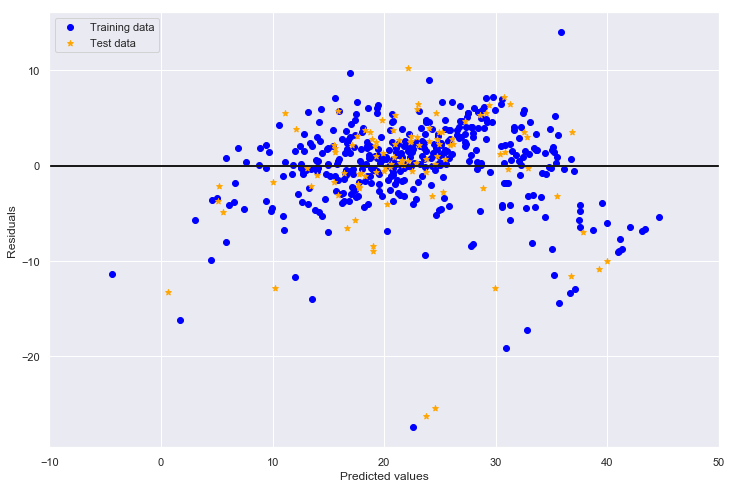

In [66]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

***

# Method 2: Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
mean_squared_error(y_train, y_train_pred)

19.326470203585725

In [69]:
mean_squared_error(y_test, y_test_pred)

33.448979997676474

# Method 3: Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [70]:
from sklearn.metrics import r2_score

In [71]:
r2_score(y_train, y_train_pred)

0.7730135569264234

In [72]:
r2_score(y_test, y_test_pred)

0.5892223849182514

***

# What does a Near Perfect Model Looks like?

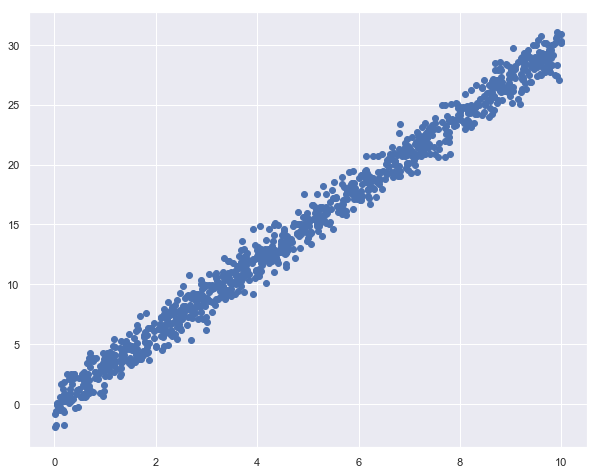

In [73]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize = (10, 8))
plt.scatter(x, y);
plt.show()

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1, 1), y_train)


y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Method 1: Residual Analysis

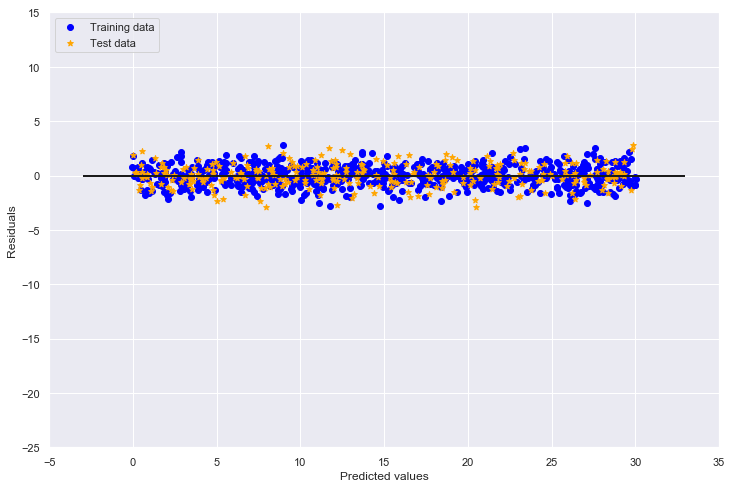

In [77]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([-25, 15])
plt.show()

# Method 2: Mean Squared Error (MSE)

In [78]:
mean_squared_error(y_train, y_train_pred)

0.862808122458205

In [79]:
mean_squared_error(y_test, y_test_pred)

1.06652056061233

# Method 3: Coefficient of Determination, $R^2$

In [80]:
r2_score(y_train, y_train_pred)

0.9887688169847341

In [81]:
r2_score(y_test, y_test_pred)

0.9862365252130854

***

# Yet to be covered

* Mean Absolute Error
* Stratified Shuffle Split
* Feature Engineering. E.g., Combining Features, Designing derivative features
* Data preparation. E.g., missing values etc.
* Categorical features
* Transform data / feature scaling. Scikit-learn Pipeline
* Fine Tuning. E.g., Grid Search, Randomized Search
* Ensemble Methods


***